In [ ]:
!git clone https://gitlab.com/MITx-community/data-science/6.419/report-template-jupyterbook.git reports
!cd reports
!pip install -r requirements.txt
!git submodule update --init --recursive --remote

Cloning into 'reports'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 149 (delta 5), reused 0 (delta 0), pack-reused 137
Receiving objects: 100% (149/149), 76.81 KiB | 15.36 MiB/s, done.
Resolving deltas: 100% (71/71), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
fatal: not a git repository (or any of the parent directories): .git


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as ss
import scipy.special
from scipy.stats import binom

Consider a binomial model where each of 31000
 individuals has a probability of 0.00203
 (or 2.03
 per 1000) of dying due to breast cancer. Use the binomial pmf to calculate the probability that exactly 63
 of the 31000
 patients die of breast cancer.

In [ ]:
scipy.stats.binom.pmf(63, 31000, 0.00203) # k being the 63 patients that will die, n being the population and p being prob

0.050244686644566564

In [ ]:
treatment = binom.pmf(39, 31000, 0.00125)
control = binom.pmf(63, 31000, 0.00203)
print(f'control :{control}', f'treatment :{treatment}')

control :0.050244686644566564 treatment :0.06373430196761527


In [ ]:
from scipy.stats import fisher_exact

data = [[39,63],[30961,30937]]
odd_ratio, p_value = fisher_exact(data,'less')

print(f'odd_ratio: {odd_ratio}',f'p-value: {p_value}')

odd_ratio: 0.6185677526719483 p-value: 0.011094091844052023


# Hubble's Constant
In this exercise, we will investigate the correlation present in astronomical data observed by Edwin Hubble in the period surrounding 1930.
1. Calculate mean
2. Standard Deviation
3. Covariance
4. Hubble covariance

In [25]:
print("## Solving Hubbles' constant ## \n")

#given dataset
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

print("1- Xs Mean: " + str(Xs.mean()) + " ,Ys Mean: " + str(Ys.mean()) + "\n")


# Numpy's std calculates the POPULATION standard Deviation, and the exercise asked for the Sample std
from statistics import stdev, pstdev

print("1- Xs Stdev: " + str(stdev(Xs)) + " ,Ys Stdev: " + str(stdev(Ys)) + "\n")

#Covariance
print("Numpy Covariance: " + str(np.cov(Xs,Ys)) + "\n" ) # Population covariance, with numpy

  #Function for covariance:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

print("Sample Covariance: " + str(covariance(Xs,Ys)) + "\n")

# Happens the same with correlation, the way numpy calculates it is different
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

print("Sample Correlation: " + str(correlation(Xs,Ys)) + "\n")


# Linear Regression # 
from scipy.stats import linregress

print("Linear Regression Statistics: " + str(linregress(Xs, Ys)) + "\n")

## Solving Hubbles' constant ## 

1- Xs Mean: 0.9199250000000001 ,Ys Mean: 425.6175

1- Xs Stdev: 0.6533948258734996 ,Ys Stdev: 348.73365749772296

Numpy Covariance: [[4.26924798e-01 1.91207065e+02]
 [1.91207065e+02 1.21615164e+05]]

Sample Covariance: 191.20706528260868

Sample Correlation: 0.8391399162310663

Linear Regression Statistics: LinregressResult(slope=447.87059914099837, intercept=13.610139085217043, rvalue=0.8391399162310663, pvalue=2.994565602899751e-07, stderr=61.89254821132255, intercept_stderr=69.34723133511908)



# Noise Transformation

Each data point is one planet in our solar system (with the addition of the planetoid Pluto, which will be henceforth referred to as a planet for simplicity).

The X
 values are the semi-major axis of each planet's orbit around the Sun. A planetary orbit is elliptical in shape, and the semi-major axis is the longer of the two axes that define the ellipse. When the ellipse is nearly circular (which is true for most planets), the semi-major axis is approximately the radius of said circle. The X
 values are measured in units of Astronomical Units (AU). One AU is very close to the average distance between the Sun and Earth (defined as 149597870700 meters), hence, the Earth's semi-major axis is essentially 1 AU due to its very circular orbit.

The Y
 values are the orbital period of the planet, measured in Earth years (365.25 days), so Earth also has a Y=1
 year.

Sample Correlation: 0.9888323018726732

## This residuals vs normal relationship shows that this is a FALSE high correlation! ## 



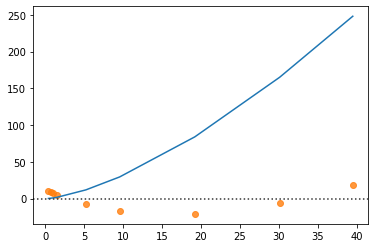

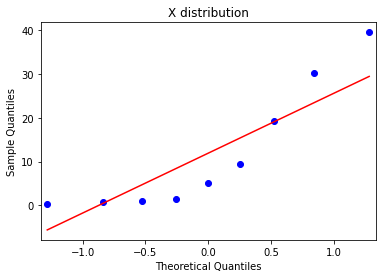

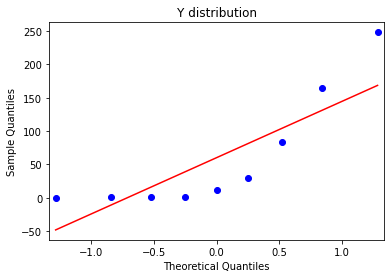


 Linear Regression Statistics: LinregressResult(slope=1.4995325773381893, intercept=0.0013370447605036695, rvalue=0.9999998085102114, pvalue=1.0116880823394698e-23, stderr=0.00035074763815870957, intercept_stderr=0.000765102967688877)



In [38]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

import matplotlib.pyplot as plt

plt.plot(Xs, Ys)

print("Sample Correlation: " + str(correlation(Xs,Ys)) + "\n")

import seaborn as sns

sns.residplot(x=Xs, y=Ys)

print("## This residuals vs normal relationship shows that this is a FALSE high correlation! ## \n")

# Plotting a Q-Q plot as instructed in the exercise

import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()


#getting the normalized version, applying log
Xs_log = np.log(Xs)
Ys_log = np.log(Ys)

print("\n Linear Regression Statistics: " + str(linregress(Xs_log, Ys_log)) + "\n")